# Data Analysis of Africa Food Supply and Consumption Data

In [9]:
#importing packages
import pandas_profiling as pp
import altair as alt

import matplotlib.pyplot as plt
import plotly.express as px

from plotly.offline import iplot
import plotly.io as pio
%matplotlib inline

In [4]:
#importing the neccessary packages
import pandas as pd
import numpy as np

import seaborn as sb
import datetime
import ipywidgets as widgets
import plotly.graph_objects as go
from IPython.display import display, HTML

In [10]:
#loading datasets
production = pd.read_csv("Africa Food Production (2004 - 2013).csv")

supply = pd.read_csv("Africa Food Supply (2004 - 2013).csv")


In [13]:
#this code creates a copy of my dataset for cleaning
prod = production.copy()
supp = supply.copy()

In [14]:
#change the year  and item column datatype to categorical values
prod['Year'] = prod['Year'].astype('category')
prod['Country'] = prod['Country'].astype('category')

#changes the header to specify the S.I unit of the values as kilotons
prod = prod.rename({'Value': 'Quantity(kt)'}, axis = 'columns')

In [17]:
#checking the info of my dataset
prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23110 entries, 0 to 23109
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Country       23110 non-null  category
 1   Item          23110 non-null  object  
 2   Year          23110 non-null  category
 3   Quantity(kt)  23110 non-null  int64   
dtypes: category(2), int64(1), object(1)
memory usage: 408.1+ KB


In [19]:
#checking the info about my data
supp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  450 non-null    object
 1   Year     450 non-null    int64 
 2   Value    450 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 10.7+ KB


*Basically, the countries with zero production and supply of some items are not being recorded as null values which will be left as such*

# Data Exploration(Food Production)

In [21]:
#groups the data by countries, year and item produced
prod_g = prod.groupby(['Country', 'Year', 'Item'], sort = False)['Quantity(kt)'].sum()
prod_g = prod_g.to_frame().reset_index()
prod_g.head()

,Country,Year,Item,Quantity(kt)
0,Algeria,2004,"Alcohol, Non-Food",0
1,Algeria,2004,Apples and products,165
2,Algeria,2004,"Aquatic Animals, Others",0
3,Algeria,2004,Aquatic Plants,0
4,Algeria,2004,Bananas,0


In [24]:
#groups data by year and sums up the quatity of food produced in Kilotons
prod_total = prod.groupby(['Country', 'Year'])['Quantity(kt)'].sum()
prod_total = prod_total.to_frame().reset_index()
prod_total.head()

,Country,Year,Quantity(kt)
0,Algeria,2004,15536
1,Algeria,2005,15667
2,Algeria,2006,16417
3,Algeria,2007,14763
4,Algeria,2008,13841


In [29]:
#sums the total production quantity per country
country_total = prod.groupby(['Country'])['Quantity(kt)'].sum()
country_total = country_total.to_frame().reset_index()
country_total.head()

,Country,Quantity(kt)
0,Algeria,188650
1,Angola,195499
2,Benin,88072
3,Botswana,4808
4,Burkina Faso,100129


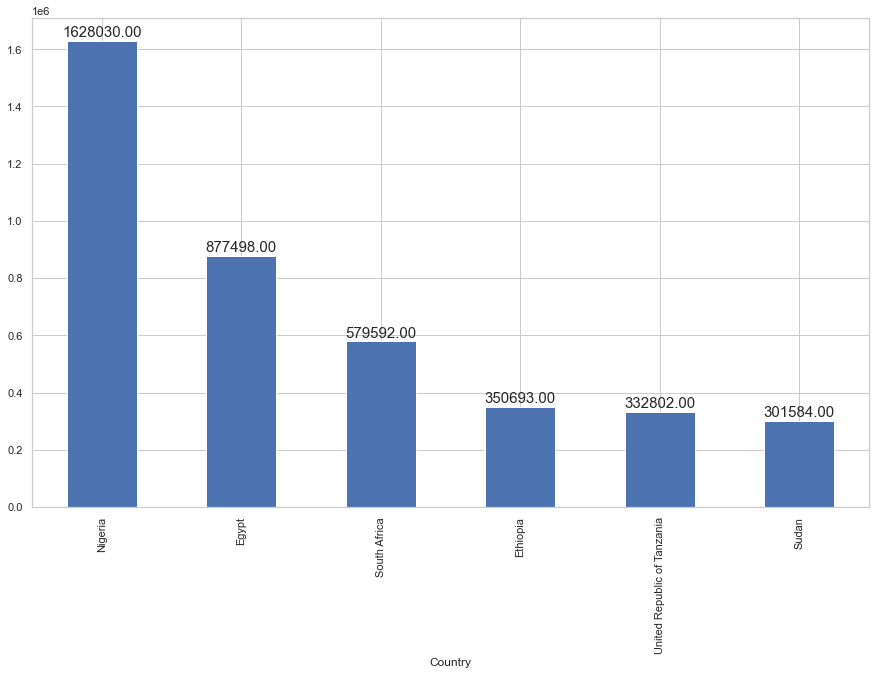

In [133]:
#creates a bar chart showing the countries with the highest quantity of food produced irrespective of item and year
plt.figure(figsize = (15, 9));

plots = prod.groupby(['Country'])['Quantity(kt)'].sum().sort_values(ascending = False).head(6).plot(kind = 'bar');

for bar in plots.patches:
   
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
  plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
 

In [51]:
#gest the mean values of production and also the country names
prod_value = prod.groupby(['Country'])['Quantity(kt)'].agg('mean')

prod_data = prod['Country'].value_counts().sort_index().index

In [63]:
#plots this information on a map
import folium
trace = go.Choropleth(
    locationmode = 'country names',
    locations = prod_data,
    text = prod_data,
    colorscale = 'viridis_r',
    z = prod_value.values
)
df3 = [trace]
layout = go.Layout(
    title = 'The Average Food Production Quantity(kt) in different Parts of Africa(2004 - 2013)')

fig = go.Figure(data = df3, layout = layout)
iplot(fig)

**The map above shows the different averages of production quantity of items in different african countries with Nigeria having the most quantity of produced item**

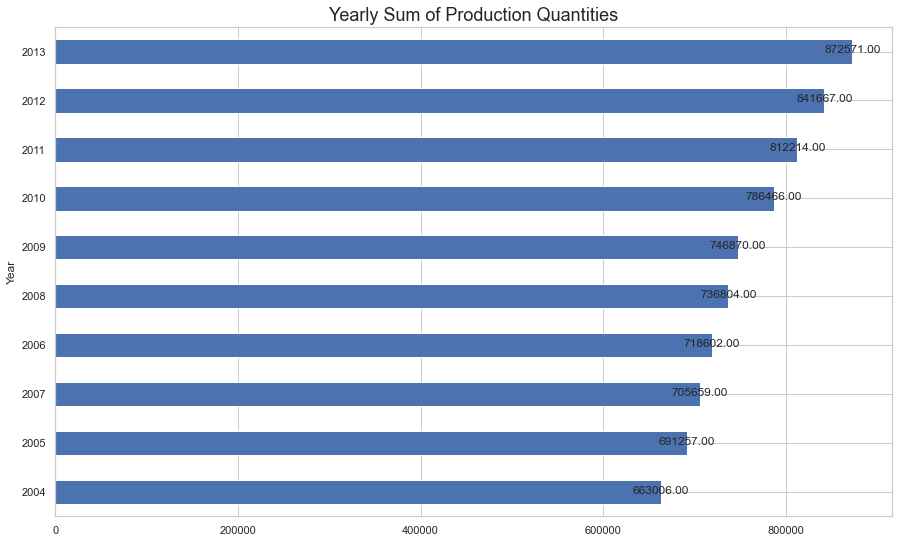

In [135]:
#set the plot size
plt.figure(figsize = (15, 9));


#groups data by year and sums up the quatity of food produced in Kilotons
time_total = prod.groupby(['Year'])['Quantity(kt)'].sum().sort_values(ascending = True).plot(kind = 'barh');

for p in time_total.patches:
    width = p.get_width()
    plt.text(100+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.2f}'.format(width),
             ha='center', va='center')
plt.title("Yearly Sum of Production Quantities", fontsize = 18);

*The bar chart above shows the steady increase in production quantity as we approach most recent years, except for 2007 where there was a slight deviation*

In [105]:
#grouping my data
yearly_prod =prod.groupby(['Country','Year'])['Quantity(kt)'].sum()
yearly_prod = yearly_prod.to_frame().reset_index()
yearly_prod.head()

,Country,Year,Quantity(kt)
0,Algeria,2004,15536
1,Algeria,2005,15667
2,Algeria,2006,16417
3,Algeria,2007,14763
4,Algeria,2008,13841


In [103]:
#displayig statistical facts
for year in list(yearly_prod['Year'].unique()):
    print(year)
    print(yearly_prod[yearly_prod['Year'] == year]['Quantity(kt)'].describe())
    print('\n')
    

2004
count        45.000000
mean      14733.466667
std       25403.686141
min          55.000000
25%        2241.000000
50%        6310.000000
75%       15536.000000
max      149857.000000
Name: Quantity(kt), dtype: float64


2005
count        45.000000
mean      15361.266667
std       26848.479437
min          62.000000
25%        2293.000000
50%        7233.000000
75%       16033.000000
max      158149.000000
Name: Quantity(kt), dtype: float64


2006
count        45.000000
mean      15968.933333
std       28200.028520
min          56.000000
25%        2329.000000
50%        7301.000000
75%       16962.000000
max      168987.000000
Name: Quantity(kt), dtype: float64


2007
count        45.000000
mean      15681.311111
std       26942.152343
min          63.000000
25%        2426.000000
50%        7295.000000
75%       17570.000000
max      157273.000000
Name: Quantity(kt), dtype: float64


2008
count        45.000000
mean      16373.422222
std       28561.046597
min          62.000000

**From the code above, i found the different statistical information for each year and printed them. It shows the maximum number of production quantities in kilotons for different years**

**With focus on the items produced in the different parts of the continent, i will like to investigate the items produced in West Africa and display this info on a wordcloud**

In [106]:
#groups data by year and sums up the quatity of food items produced in Kilotons
item_total = prod.groupby(['Country', 'Item'])['Quantity(kt)'].sum()
item_total = item_total.to_frame().reset_index()
item_total.head()

,Country,Item,Quantity(kt)
0,Algeria,"Alcohol, Non-Food",0
1,Algeria,Apples and products,3003
2,Algeria,"Aquatic Animals, Others",0
3,Algeria,Aquatic Plants,0
4,Algeria,Bananas,0


In [108]:
#separate west africa regions
West_africa = item_total.loc[item_total['Country'].isin(['Benin', 'Burkina Faso', 'Cabo Verde', 'Cote dIvoire', 'Gambia', 'Ghana', 'Guinea',' Guinea-Bissau', 'Liberia', 'Mali', 'Mauritania', 'Niger', 'Nigeria', 'Senegal', 'Sierra Leone', 'Togo'])]
West_africa.head()

,Country,Item,Quantity(kt)
188,Benin,"Alcohol, Non-Food",0
189,Benin,Apples and products,0
190,Benin,"Aquatic Animals, Others",0
191,Benin,Aquatic Plants,0
192,Benin,Bananas,157


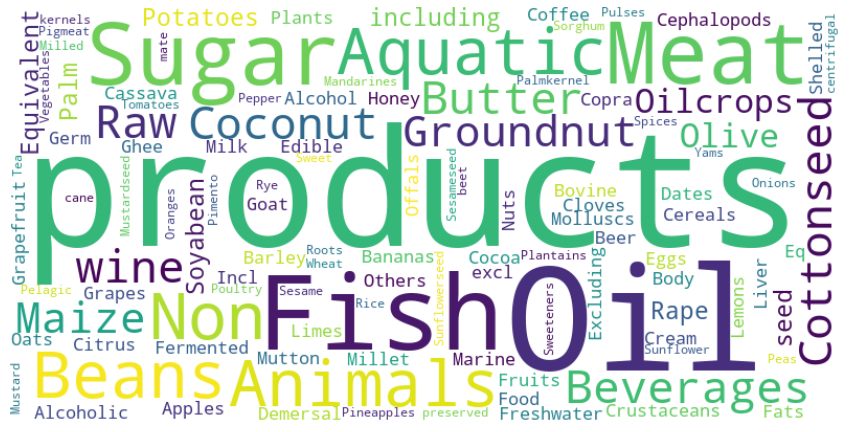

In [114]:
from wordcloud import WordCloud
words = ' '.join((lang for lang in West_africa.Item.dropna().str.replace(';', ' ').str.replace(',', ' ')))

view = WordCloud(collocation_threshold=int(1e6), width=800, height=400, background_color='white', colormap='viridis_r').generate(words)

plt.figure(figsize=(15,9))

plt.axis("off")

plt.grid(False)

plt.imshow(view, interpolation='bilinear');

**Above is a collection of food items produced in west africa**

,Country,Item,Quantity(kt)
214,Benin,Demersal Fish,54
217,Benin,"Fish, Body Oil",0
218,Benin,"Fish, Liver Oil",0
219,Benin,Freshwater Fish,229
229,Benin,"Marine Fish, Other",9
...,...,...,...
3695,Togo,"Fish, Body Oil",0
3696,Togo,"Fish, Liver Oil",0
3697,Togo,Freshwater Fish,61
3707,Togo,"Marine Fish, Other",6


In [440]:
#finds the top 10 countries that produce fish
west_africa = West_africa[(West_africa["Item"].str.contains("Fish"))]
west_africa = west_africa.groupby('Country')['Quantity(kt)'].mean()
west_africa = west_africa.to_frame(name='mean').reset_index()
west_africa_sort = west_africa.sort_values(['mean'], ascending=[False])
west_africa_sort = west_africa_sort.head(10)
west_africa_sort

,Country,mean
31,Nigeria,1149.833333
34,Senegal,666.500000
16,Ghana,614.333333
25,Mauritania,385.166667
35,Sierra Leone,291.833333
17,Guinea,178.666667
24,Mali,165.333333
30,Niger,67.833333
15,Gambia,64.666667
2,Benin,58.500000


In [462]:
#finds the top 10 countries that produce oil
west_africa = West_africa[(West_africa["Item"].str.contains("Meat"))]
west_africa = west_africa.groupby('Country')['Quantity(kt)'].mean()
west_africa = west_africa.to_frame(name='mean').reset_index()
west_africa_sort = west_africa.sort_values(['mean'], ascending=[False])
west_africa_sort = west_africa_sort.head(10)
west_africa_sort

,Country,mean
31,Nigeria,2934.75
30,Niger,761.50
24,Mali,755.75
4,Burkina Faso,518.25
16,Ghana,501.00
34,Senegal,373.25
25,Mauritania,231.75
17,Guinea,202.50
2,Benin,151.50
39,Togo,121.00


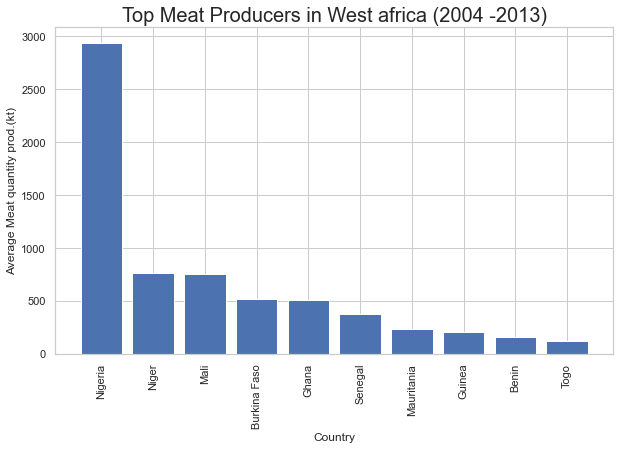

In [464]:

fig,ax = plt.subplots(figsize=(10,6))
           
plt.bar(x = 'Country',height = 'mean' , data = west_africa_sort);
plt.xticks(rotation = 90);
plt.xlabel("Country")
plt.ylabel("Average Meat quantity prod.(kt)");

plt.title("Top Meat Producers in West africa (2004 -2013)", fontsize=20);

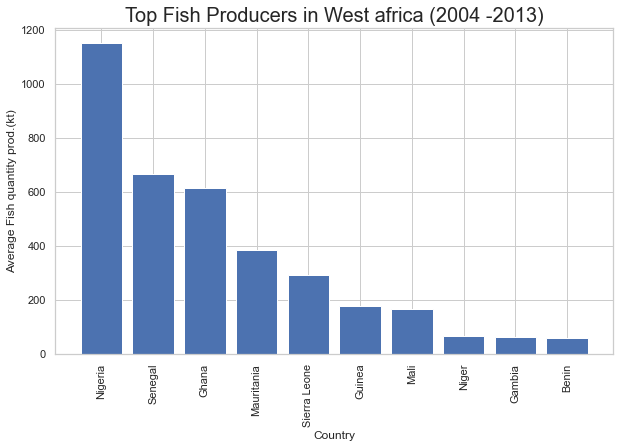

In [456]:

fig,ax = plt.subplots(figsize=(10,6))
           
plt.bar(x = 'Country',height = 'mean' , data = west_africa_sort);
plt.xticks(rotation = 90);
plt.xlabel("Country")
plt.ylabel("Average Fish quantity prod.(kt)");

plt.title("Top Fish Producers in West africa (2004 -2013)", fontsize=20);

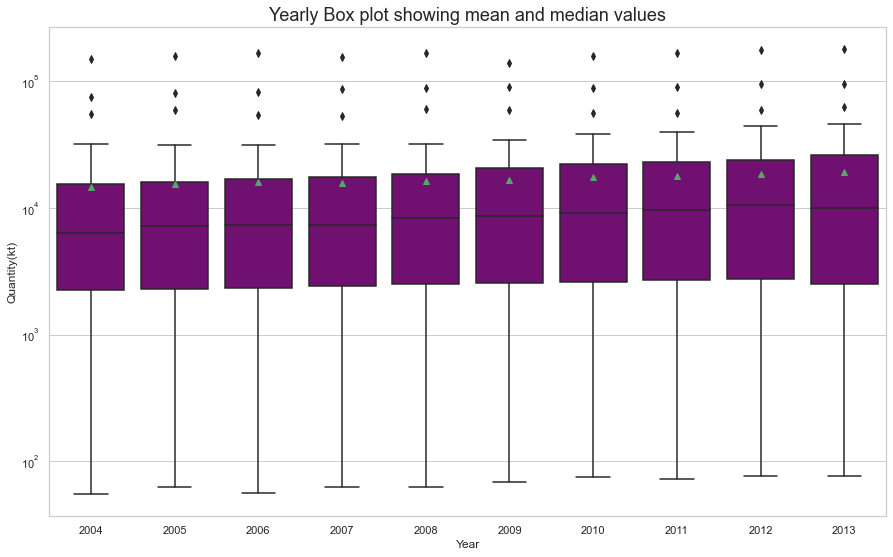

In [136]:
#a boxplot showing food production information
bar,ax = plt.subplots(figsize=(15,9))

sb.set_theme(style="whitegrid")

ax = sb.boxplot(x="Year", y="Quantity(kt)", data=prod_total, color = 'purple', showmeans=True)

#set xticks and labels
# ticks =  [0, 10, 10e2,10e3, 10e4, 10e5]
# labels = ['0', '10', '100', '1k', '10k', '100k']

ax.set_yscale('log')

#plt.yticks(ticks, labels);

plt.savefig("supplyboxplot.svg")

plt.title("Yearly Box plot showing mean and median values", fontsize = 18);

In [27]:
countries = list(prod_total['Country'].unique())

# Data Exploration(Food Consumption)

In [138]:
#display the data
supp.head()

,Country,Year,Value
0,Algeria,2004,2987
1,Algeria,2005,2958
2,Algeria,2006,3047
3,Algeria,2007,3041
4,Algeria,2008,3048


In [139]:
#change the year  and item column datatype to categorical values
supp['Year'] = supp['Year'].astype('category')
supp['Country'] = supp['Country'].astype('category')

#changes the header to specify the S.I unit of the values as kilotons
supp = supp.rename({'Value': 'Quantity(kcal)'}, axis = 'columns')

In [140]:
#displayss the changes
supp.head()

,Country,Year,Quantity(kcal)
0,Algeria,2004,2987
1,Algeria,2005,2958
2,Algeria,2006,3047
3,Algeria,2007,3041
4,Algeria,2008,3048


In [141]:
#group data
grouped_consum = supp.groupby(['Country', 'Year'])['Quantity(kcal)'].sum()
grouped_consum = grouped_consum.to_frame().reset_index()
grouped_consum.head()

,Country,Year,Quantity(kcal)
0,Algeria,2004,2987
1,Algeria,2005,2958
2,Algeria,2006,3047
3,Algeria,2007,3041
4,Algeria,2008,3048


In [149]:
#prints the lowest food consumption for each year
for year in list(grouped_consum['Year'].unique()):
    print("The lowest food consumption for {} is {} kcal".format(year,grouped_consum[grouped_consum['Year'] == year]['Quantity(kcal)'].min()))
    
    print('\n')
# supply_sort = supply.sort_values(['Quantity(kcal)'], ascending=[True])
# supply_2004_sort.head()

The lowest food consumption for 2004 is 1866 kcal


The lowest food consumption for 2005 is 1873 kcal


The lowest food consumption for 2006 is 1838 kcal


The lowest food consumption for 2007 is 1781 kcal


The lowest food consumption for 2008 is 1801 kcal


The lowest food consumption for 2009 is 1878 kcal


The lowest food consumption for 2010 is 1904 kcal


The lowest food consumption for 2011 is 1907 kcal


The lowest food consumption for 2012 is 1923 kcal


The lowest food consumption for 2013 is 1879 kcal




In [150]:
#sums the total supply quantity per country
supply_total = supp.groupby(['Country'])['Quantity(kcal)'].sum()
supply_total = supply_total.to_frame().reset_index()
supply_total.head()

,Country,Quantity(kcal)
0,Algeria,31118
1,Angola,22556
2,Benin,25378
3,Botswana,22263
4,Burkina Faso,26072


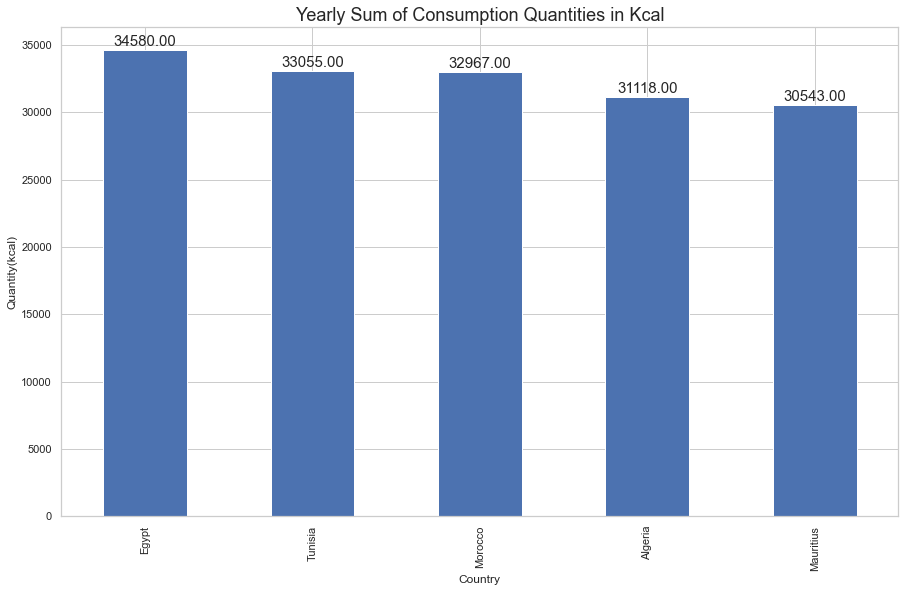

In [157]:
#creates a bar chart showing the countries with the highest quantity of food produced irrespective of item and year
plt.figure(figsize = (15, 9));

plot = supp.groupby(['Country'])['Quantity(kcal)'].sum().sort_values(ascending = False).head(5).plot(kind = 'bar');

for bar in plot.patches:
    plot.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.ylabel("Quantity(kcal)")
plt.title("Yearly Sum of Consumption Quantities in Kcal", fontsize = 18); 

**The bar chart above shows that Egypt is country with the highest consumption quantity between the 2004 and 2013 followed by Tunisia, Morocco, Algeria and Mauritius**

>*Next, i aim to plot the sum of food supply for each country on a map*

In [159]:
#gest the mean values of supply and also the country names
supp_value = supp.groupby(['Country'])['Quantity(kcal)'].agg('mean')

supp_data = supp['Country'].value_counts().sort_index().index

In [160]:
#plots this information on a map
trace = go.Choropleth(
    locationmode = 'country names',
    locations = supp_data,
    text = supp_data,
    colorscale = 'viridis_r',
    z = supp_value.values
)
df3 = [trace]
layout = go.Layout(
    title = 'The Average Food Consumption Quantity(kcal) in different Parts of Africa(2004 - 2013)')

fig = go.Figure(data = df3, layout = layout)
iplot(fig)

**It shows on the map that Zambia happens to have the lowest food consumption over the years. Now lets investigate how food consumption differs on a yearly basis**

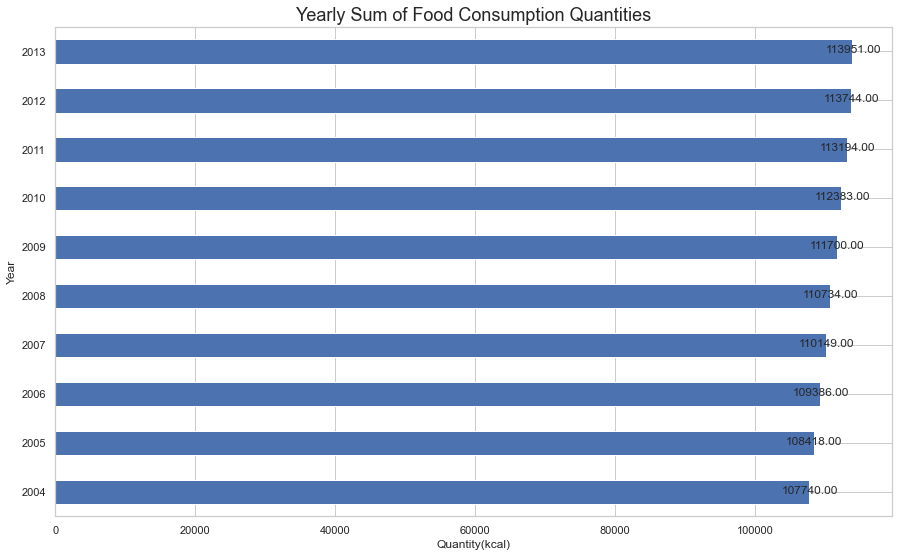

In [168]:
#set the plot size
plt.figure(figsize = (15, 9));


#groups data by year and sums up the quatity of food produced in Kilotons
time_total = supp.groupby(['Year'])['Quantity(kcal)'].sum().sort_values(ascending = True).plot(kind = 'barh');

for p in time_total.patches:
    width = p.get_width()
    plt.text(100+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.2f}'.format(width),
             ha='center', va='center')

plt.xlabel("Quantity(kcal)")
plt.title("Yearly Sum of Food Consumption Quantities", fontsize = 18);

**Food consumption increases as we approach the most recent year**

## Comparing the Food Production and Consumption of Countries in Africa

**Grouping the production data by country and year alone allows the production and consumption data to have the same structure thereby aiding the merge. Now we will be able to compare food production and food supply**

In [175]:
#merges the data together
prod_supp = pd.merge(prod_total, grouped_consum, how = 'inner')

prod_supp.head(10)

,Country,Year,Quantity(kt),Quantity(kcal)
0,Algeria,2004,15536,2987
1,Algeria,2005,15667,2958
2,Algeria,2006,16417,3047
3,Algeria,2007,14763,3041
4,Algeria,2008,13841,3048
5,Algeria,2009,19820,3110
6,Algeria,2010,20263,3142
7,Algeria,2011,21778,3217
8,Algeria,2012,24206,3272
9,Algeria,2013,26359,3296


In [176]:
prod_supp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 450 entries, 0 to 449
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Country         450 non-null    category
 1   Year            450 non-null    category
 2   Quantity(kt)    450 non-null    int64   
 3   Quantity(kcal)  450 non-null    int64   
dtypes: category(2), int64(2)
memory usage: 13.2 KB


## Finding the Population of Countries in the original Dataset

**In order to understand the food shortages in africa, there is need to investigate the diiferent population of countries in Africa and calculate food consumption for each year given by the country's data**

In [181]:
#loads the population data
population = pd.read_csv("population_total_long.csv")

In [286]:
#creates a list to effectively account for countries in originial data set whose names differ form population dataset
#this is done to enable the two data set to b merged
old = ['Egypt, Arab Rep.', 'Tanzania', 'Gambia, The', 'Eswatini','Congo, Dem. Rep.']

new = ['Egypt', 'United Republic of Tanzania','Gambia', 'Swaziland', 'Congo']

In [287]:
#replaces old names wuth new
population['Country Name'] = population['Country Name'].replace(old,new)

In [290]:
#effectivel filters the data to serve my purpose
test = population[population['Year'] >= 2004]
test = test[test['Year']<= 2013]

In [291]:
new = test.loc[test['Country Name'].isin(countries)]

new = new.groupby(['Country Name', 'Year'])['Count'].sum()

new = new.to_frame().reset_index()
    
new = new.rename({'Country Name': 'Country'}, axis = 'columns')

In [434]:
#save datasets to csv files
new.to_csv("Africa poplation 2004 - 2013", index = False)
population.to_csv("Africa poplation(All) 2004 - 2013", index = False)


In [293]:
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  450 non-null    object
 1   Year     450 non-null    int64 
 2   Count    450 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 10.7+ KB


In [466]:
#groups data by year and sums up the quatity of food produced in Kilotons
pop_total = new.groupby(['Country'])['Count'].mean()
pop_total = pop_total.to_frame().reset_index()
pop_total.head()

,Country,Count
0,Algeria,35187726.8
1,Angola,22215754.4
2,Benin,8843947.3
3,Botswana,1924970.3
4,Burkina Faso,14969566.8


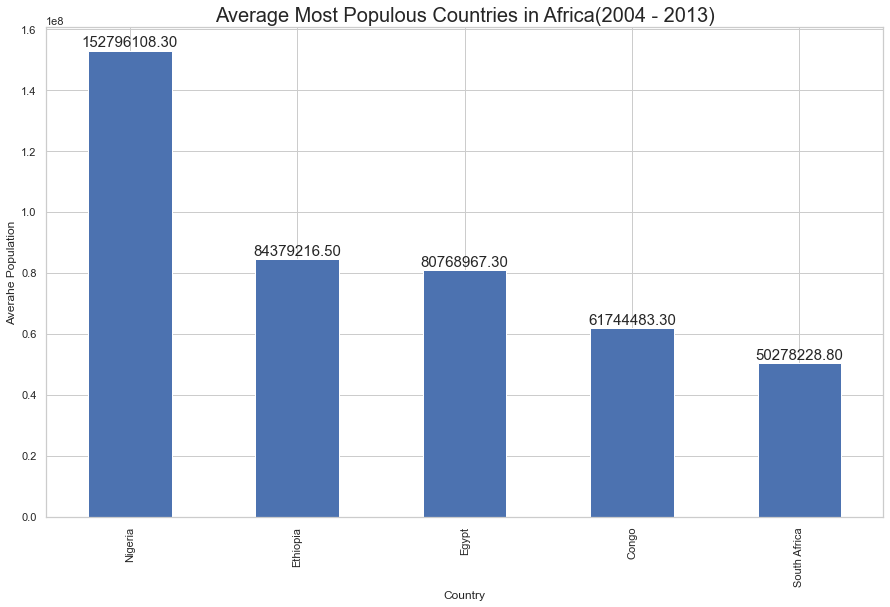

In [469]:

f#creates a bar chart showing the countries with the highest quantity of food produced irrespective of item and year
plt.figure(figsize = (15, 9));

plots = pop_total.groupby(['Country'])['Count'].mean().sort_values(ascending = False).head(5).plot(kind = 'bar');

for bar in plots.patches:
   
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
  plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

plt.title("Average Most Populous Countries in Africa(2004 - 2013)", fontsize = 20)
plt.ylabel("Averahe Population");

In [294]:
#merges the data together
test1 = pd.merge(prod_supp, new, how = 'left')

test1.head(20)

,Country,Year,Quantity(kt),Quantity(kcal),Count
0,Algeria,2004,15536,2987,32692163
1,Algeria,2005,15667,2958,33149724
2,Algeria,2006,16417,3047,33641002
3,Algeria,2007,14763,3041,34166972
4,Algeria,2008,13841,3048,34730608
5,Algeria,2009,19820,3110,35333881
6,Algeria,2010,20263,3142,35977455
7,Algeria,2011,21778,3217,36661444
8,Algeria,2012,24206,3272,37383887
9,Algeria,2013,26359,3296,38140132


In [295]:
#shows that i have successfully gotten the population of the 45 countries
test1[test1['Count'].isnull()]

,Country,Year,Quantity(kt),Quantity(kcal),Count


In [296]:
test1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 450 entries, 0 to 449
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Country         450 non-null    object
 1   Year            450 non-null    int64 
 2   Quantity(kt)    450 non-null    int64 
 3   Quantity(kcal)  450 non-null    int64 
 4   Count           450 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 21.1+ KB


## Compare the average Food production and consumption for each year

In [299]:
#show the data
test1.head()

,Country,Year,Quantity(kt),Quantity(kcal),Count
0,Algeria,2004,15536,2987,32692163
1,Algeria,2005,15667,2958,33149724
2,Algeria,2006,16417,3047,33641002
3,Algeria,2007,14763,3041,34166972
4,Algeria,2008,13841,3048,34730608


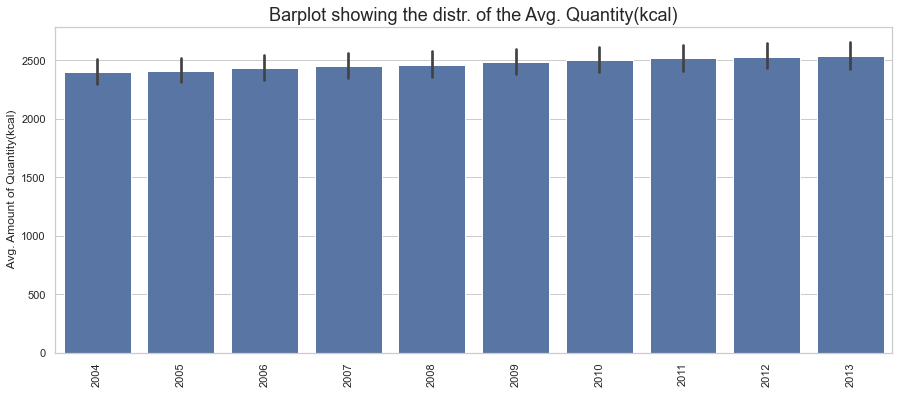

In [311]:
base_color = sb.color_palette()[0]#sets the color to one instead of multiple

plt.figure(figsize = [15, 6]) 

#line of code to plot the bar chart
sb.barplot(data = test1, x = 'Year', y = 'Quantity(kcal)' ,color = base_color, 
           order = test1['Year'].value_counts().index)

plt.xticks(rotation = 90);

plt.title('Barplot showing the distr. of the Avg. Quantity(kcal)', fontsize = 18)
plt.xlabel('');
plt.ylabel(' Avg. Amount of Quantity(kcal)');




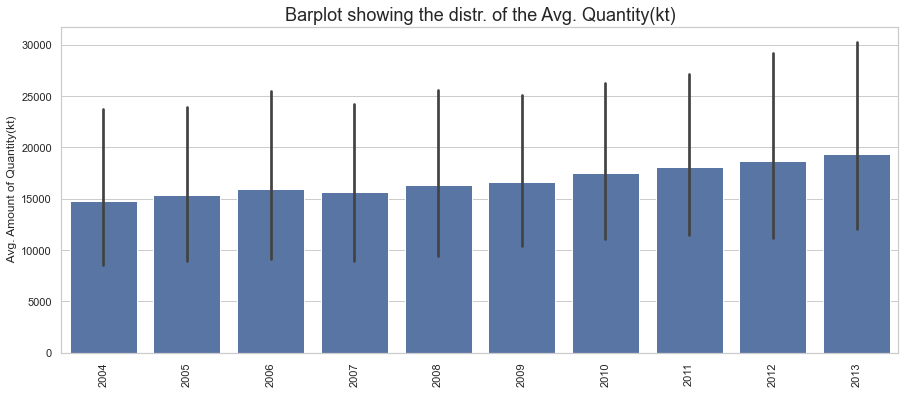

In [313]:
plt.figure(figsize = [15, 6]) 

#line of code to plot the bar chart
sb.barplot(data = test1, x = 'Year', y = 'Quantity(kt)' ,color = base_color, 
           order = test1['Year'].value_counts().index)

plt.xticks(rotation = 90);

plt.title('Barplot showing the distr. of the Avg. Quantity(kt)', fontsize = 18)
plt.xlabel('');
plt.ylabel(' Avg. Amount of Quantity(kt)');


**One can notice how there is a steady increase in the averages as we approach the most recent year**

# Calculating Africa's Food Shortages

**In determinig food shortages, I evaluate if the total production for each year matches the supply for the population. Given my population data merged with my dataset, i can now procee to make neccessary calculation sto complete this process**


#### Calculation Process to get Percentage shortage or surplus
*Quantity(kcal) per person per day multiplied by  (365 days per year or 366 for leap years)= total kcal per person per year*

*Convert kcal per person per year to kt given(1 kcal (IT) = 1.0006692160612E-9 kton) =  kilotons per person per year*

*Total consumption =*

*Population x Kilotons per person per year = Total_consumption (kt per year)*

*Compare with Quantity(kt) to get shortages or surplus*

*Quantity(kt per year)-Total_consumption(kt per year)= Shortage or Surplus per year*

*Shortage or Surplus/Total consumption(kt per year)* 100 = percentage surplus or shortages*

In [386]:
def calculate(value):
    
    #calculates kilocalories per person per year
    df['Quantity(kcal)/person_year'] = df.loc[:,'Quantity(kcal)'] *366
    
    #converts kilocalories to kilon tons
    df['kt/person_year'] = df.loc[:,'Quantity(kcal)/person_year'] * 1.0006692160612E-9
    
    #multiplies kilotons per personperyear with population count
    df['kt/year'] = df['Count'] * df['kt/person_year']
    
    #calc. shortage or surplus by removing total produced from total consumed
    df['shortage_surplus'] = df['Quantity(kt)'] - df['kt/year']
    
    #calc. percentage gain or loss
    df['Percent(%)'] = (df['shortage_surplus'] / df['kt/year']) *100
    
    return df
    

In [414]:
def calculate_leap(value):
    
    #calculates kilocalories per person per year
    df['Quantity(kcal)/person_year'] = df.loc[:,'Quantity(kcal)'] *365
    
    #converts kilocalories to kilon tons
    df['kt/person_year'] = df.loc[:,'Quantity(kcal)/person_year'] * 1.0006692160612E-9
    
    #multiplies kilotons per personperyear with population count
    df['kt/year'] = df['Count'] * df['kt/person_year']
    
    #calc. shortage or surplus by removing total produced from total consumed
    df['shortage_surplus'] = df['Quantity(kt)'] - df['kt/year']
    
    #calc. percentage gain or loss
    df['Percent(%)'] = (df['shortage_surplus'] / df['kt/year']) *100
    
    return df
    

In [416]:
#accounting for normal year
appended_data = []
for year in other:
    #filters the year to account for leap years
    df = test1[test1['Year'] == year]
    
    data = calculate(year)
    
    appended_data.append(data)
    # see pd.concat documentation for more info
    
appended_data = pd.concat(appended_data)
    

C:\Users\fatkayd\AppData\Local\Temp\ipykernel_22740\4283977205.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\fatkayd\AppData\Local\Temp\ipykernel_22740\4283977205.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\fatkayd\AppData\Local\Temp\ipykernel_22740\4283977205.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

C:\Users\fatkayd\AppData\Local\Temp\ipykernel_22740\4283977205.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\fatkayd\AppData\Local\Temp\ipykernel_22740\4283977205.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\fatkayd\AppData\Local\Temp\ipykernel_22740\4283977205.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

In [417]:
#accounting for leap years
appended_data2 = []
for year in leap_year:
    #filters the year to account for leap years
    df = test1[test1['Year'] == year]
    
    data = calculate_leap(year)
    
    appended_data2.append(data)
    # see pd.concat documentation for more info
    
appended_dataframe = pd.concat(appended_data2)
    

C:\Users\fatkayd\AppData\Local\Temp\ipykernel_22740\1144312354.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\fatkayd\AppData\Local\Temp\ipykernel_22740\1144312354.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\fatkayd\AppData\Local\Temp\ipykernel_22740\1144312354.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

In [418]:
#join the two calcuated frames together
frames = [appended_dataframe, appended_data]

master_df = pd.concat(frames)
master_df = master_df.reset_index(drop = True)

In [471]:
master_df.head(10)

,Country,Year,Quantity(kt),Quantity(kcal),Count,Quantity(kcal)/person_year,kt/person_year,kt/year,shortage_surplus,Percent(%)
0,Algeria,2004,15536,2987,32692163,1090255,0.001091,35666.646902,-20130.646902,-56.441097
1,Angola,2004,13028,2030,18758145,740950,0.000741,13908.148870,-880.148870,-6.328296
2,Benin,2004,7963,2461,7750004,898265,0.000899,6966.216129,996.783871,14.308828
3,Botswana,2004,461,2191,1765527,799715,0.000800,1412.863303,-951.863303,-67.371224
4,Burkina Faso,2004,8323,2505,13030569,914325,0.000915,11922.148158,-3599.148158,-30.188756
5,Cabo Verde,2004,148,2523,456617,920895,0.000922,420.777715,-272.777715,-64.827035
6,Cameroon,2004,13739,2246,17259322,819790,0.000820,14158.488334,-419.488334,-2.962805
7,Central African Republic,2004,2242,1989,3959875,725985,0.000726,2876.733721,-634.733721,-22.064389
8,Chad,2004,3660,2026,9734767,739490,0.000740,7203.580377,-3543.580377,-49.191932
9,Congo,2004,2241,2263,53068880,825995,0.000827,43863.964374,-41622.964374,-94.891023


In [431]:
#show how the countries have surplus and food shortages
view = px.scatter(master_df, x="Percent(%)", y="Country", color='Year', template='plotly_dark', title='Percentage Shortage and Surplus',
                width=1000, height=1000)
view.show()

**The chart above shows the different deficits and surpluses of different countries with regards food production and consumption. Mauritius and swaziland have very outstanding outliers and i will be removing these countries to focus on the rest**

In [432]:
#exempting the two countries stated above
view = px.scatter(master_df, x="Percent(%)", y="Country", color='Year', template='plotly_dark', title='Shortages and Surplus(%)',
                width=900, height=800)
view.update_xaxes(range=[-100, 100])
view.show()


**From the interactive plot above, one can see the disparity in food shortages and surplus across the different years for the different countries**

In [355]:
#creates a list of years sepereating leap year and normal year
years = list(test1.Year.unique())
leap_year = [2004, 2008, 2012]
other = [2005, 2006, 2007,2009, 2010, 2011, 2013]

In [362]:
#converts to categorical datatypes
test1['Year'] = test1['Year'].astype('category')
test1['Country'] = test1['Country'].astype('category')

# Proposed Solution

**After discovering the vast amount of countries with food shortages, my proposed solution to this problem is for African leaders to develop a system that allows countries with food surplus share their resources with countries struggling with food shortages. Data with regards countries experiencing food shortages should be easily accessible to countries with food surplus and a fair sharing quota be developed. This sharing quota will allow food items to be shared to other countries fairly without any imbalance.**

In [425]:
#to get the total surplus and total shortage
exp = master_df[master_df['Percent(%)'] > 0]

exp1 = master_df[master_df['Percent(%)'] < 0]

In [430]:
#find the deficit in the whole of Africa
exp['Percent(%)'].sum() + exp1['Percent(%)'].sum()

-2457.794535965715

**From the above calculation, one can see that there is still a deficit of about of about -2457% in the continent. This goes to show that majority of countries in Africa are experiencing food shortages.**

**However, Countries that have higher producing power should produce more and overpopulation should be checked. In the course of my calculations, i have realisied that Countries infact do produce a lot of food items but The populatio of the country has not helped in making sure that the food produced s enough to serve all**

## Conclusions
>My main interest was to investigate food shortages and surplus in African Countries.Also, i investigated the trends in food production and consummptiom over the years, after which i compared the average food production and condumption for each year

## limitations
- Any kind of hypothesis testing have not been performed, the basis of this analysis are historical data. Hence, any suggestion for future strategies should be based on a further analysis.
- Unfortunately, a profile of Countries was not possible as the findings, according to the current data, does not show any isnightful trend about Countriess.
- This analysis does not consider socio-economical variables regarding Countries that may play a pivotal role in understanding the various circumstances under which they are. A suggestion for further analysis is to consider more socio-economical and circumstances of each country at a point in time or year.